<a href="https://colab.research.google.com/github/jorellano/Crime-Sf/blob/master/Chtpt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fasdtbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 13.3MB/s 
     |████████████████████████████████| 1.1MB 30.0MB/s 
     |████████████████████████████████| 194kB 67.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e63f4812a9ff413f9be72a59977bcf4c')

In [4]:
search_images_bing

<function fastbook.search_images_bing>

In [5]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contenturl')
len(ims)


150

In [6]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']



In [7]:
#create a directory where images is located
import os
os.mkdir('images')

In [8]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

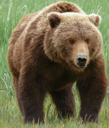

In [9]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [10]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')



In [11]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))
        


In [12]:
fns = get_image_files(path)
fns

(#413) [Path('bears/black/00000014.jpg'),Path('bears/black/00000020.jpg'),Path('bears/black/00000093.jpg'),Path('bears/black/00000007.jpg'),Path('bears/black/00000122.jpg'),Path('bears/black/00000005.jpg'),Path('bears/black/00000102.jpg'),Path('bears/black/00000017.jpg'),Path('bears/black/00000037.jpg'),Path('bears/black/00000137.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#16) [Path('bears/black/00000126.jpg'),Path('bears/black/00000016.jpg'),Path('bears/black/00000088.jpg'),Path('bears/black/00000104.jpg'),Path('bears/teddy/00000017.jpg'),Path('bears/teddy/00000070.jpg'),Path('bears/teddy/00000144.jpg'),Path('bears/grizzly/00000037.jpg'),Path('bears/grizzly/00000051.jpg'),Path('bears/grizzly/00000058.jpg')...]

In [14]:
failed.map(Path.unlink);


In [15]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

# From Data to DataLoaders

In [16]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])


In [17]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

#clean

In [18]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e63f4812a9ff413f9be72a59977bcf4c')

In [19]:
dls = bears.dataloaders(path)

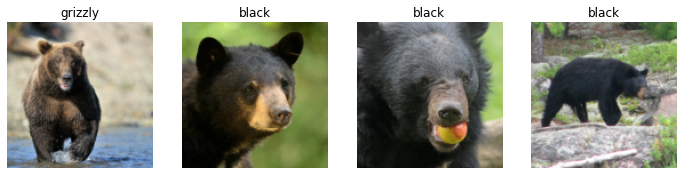

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

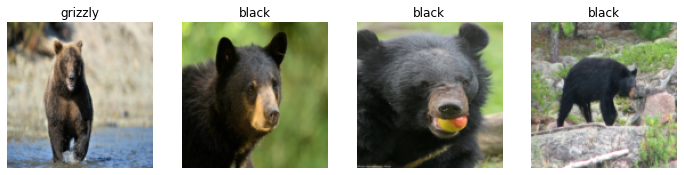

In [23]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

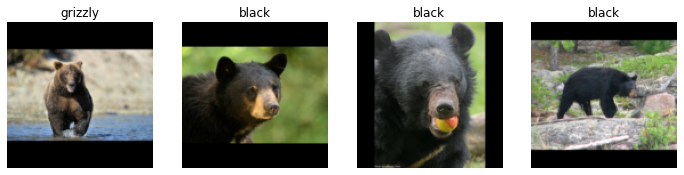

In [24]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')
)
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

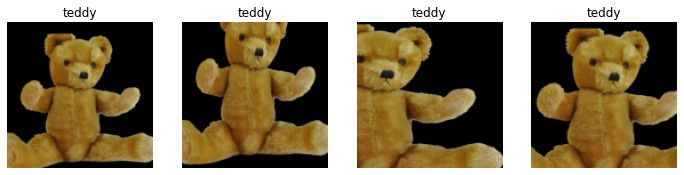

In [25]:
bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

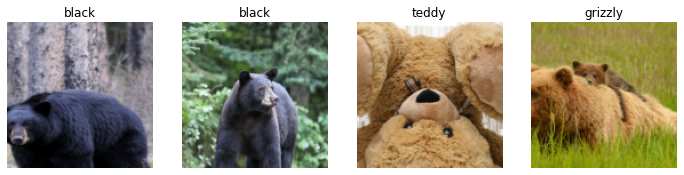

In [27]:
bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=False)

# Data Augmetation

refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images a re rotation, flipping, perspective warping, brightness changes and contrast changes.